# EDA on Haberman data for cancer patient survival rate

FEATURES : age_of_patient, year_of_operation , number_of_positve_axillary_nodes_detected  
CLASSES : patient_survived_less_than_five_years(2) , patient_survived_more_than_five_years(1)    
OBJECTIVE : predict whether a patient will survive after the surgery.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
haberman = pd.read_csv('haberman.csv')

In [3]:
print (haberman.shape)

(306, 4)


There are 306 data points and 4 features.

In [4]:
print(haberman.columns)

Index(['Age', 'Year', 'nodes', 'survival_status'], dtype='object')


Here Age is patient's age.  
Year is the year of surgery.  
nodes is number of positive axillary nodes detected .      
survival_status : 1 means patient survive for more than five years. 2 : means that patient survived for less than 5 years. 

In [5]:
haberman["survival_status"].value_counts()


1    225
2     81
Name: survival_status, dtype: int64

This is unbalanced dataset.  
225 patients have survived for more than five years.  
81 patients have survived for less than five years.  

# UNIVARIATE ANALYSIS (PDF , CDF , BoxPlots , Violin Plots)

In [6]:
import numpy as np

## HISTOGRAMS AND PDF 

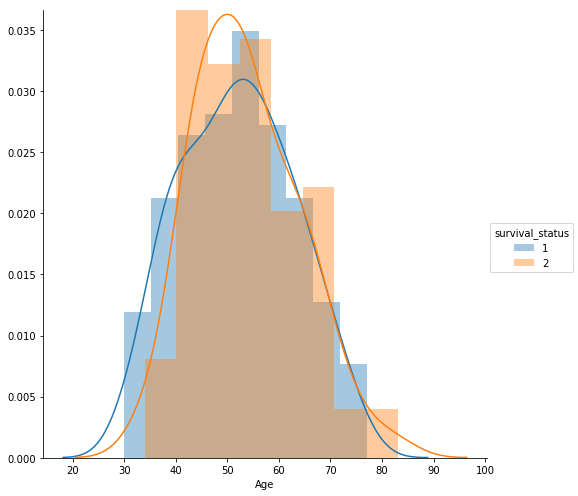

In [7]:
sns.FacetGrid(haberman, hue="survival_status", size=7) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

Using age as parameter and observing the pdf it is very difficult to predict the survival status as large part of the two curves overlap.

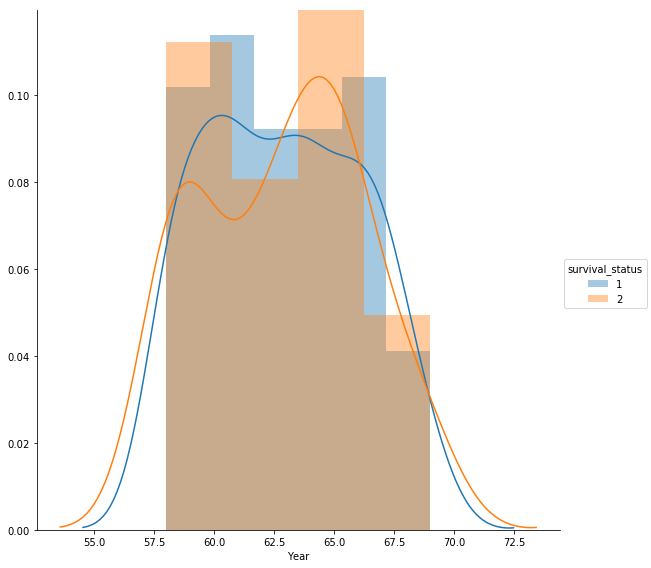

In [8]:
sns.FacetGrid(haberman, hue="survival_status", size=8) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.show();

Using year of surgery as parameter and observing the pdf it is very difficult to predict the survival status.

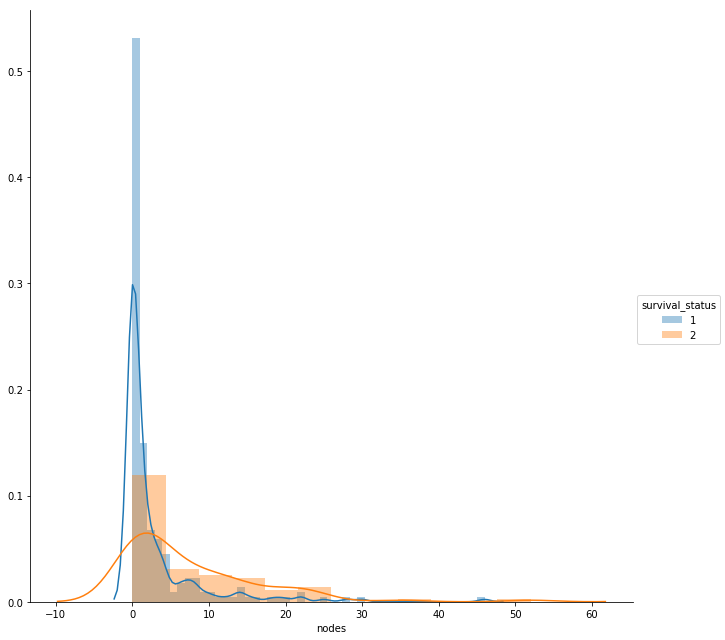

In [9]:
sns.FacetGrid(haberman, hue="survival_status", size=9) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Here we can observe that if positive axillary nodes is zero ,there is a high chance of person surviving more than 5 years of age.

## CDF

In [10]:
less_than_five = haberman.loc[haberman["survival_status"]==2];
more_than_five = haberman.loc[haberman["survival_status"]==1];

In [13]:
counts, bin_edges = np.histogram(less_than_five['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_than_five['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

AttributeError: 'tuple' object has no attribute 'addlegend'

Taking Age as parameter and plotting the cdf and pdf curve , we observe both the classes have overlapping curve.
So Age can not be taken as a parameter.

[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


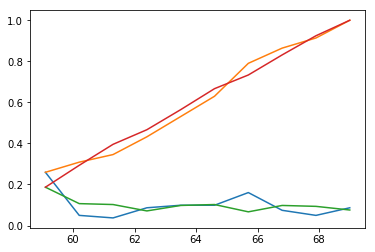

In [14]:
counts, bin_edges = np.histogram(less_than_five['Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_than_five['Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

Taking Year of surgery as parameter and plotting the cdf and pdf curve , we observe both the classes have overlapping curve.
So Year of surgery can not be taken as a parameter.

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]
[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


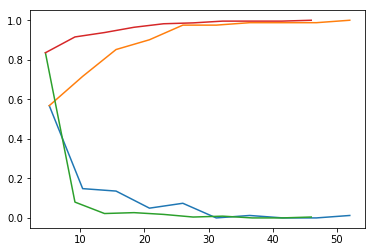

In [21]:
counts, bin_edges = np.histogram(less_than_five['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_than_five['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

About than 83% of people who survived more than 5 years  have less than around 5 axillary positive nodes.
Still using if condition if we try to make a model then it will give a high error.

## BOX PLOT

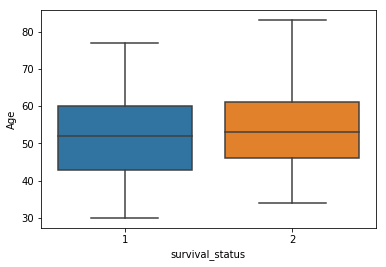

In [22]:
sns.boxplot(x='survival_status',y='Age', data=haberman)
plt.show()

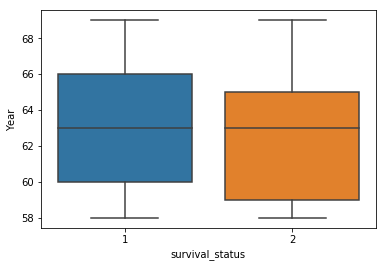

In [24]:
sns.boxplot(x='survival_status',y='Year', data=haberman)
plt.show()

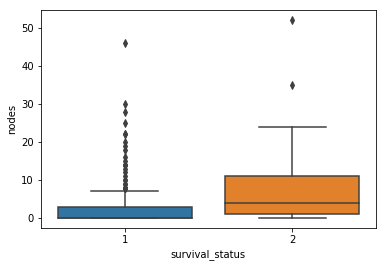

In [26]:
sns.boxplot(x='survival_status',y='nodes', data=haberman)
plt.show()

The observation we made using the pdf and cdf plots can be seen here again .   Number of axillary nodes can be a good 
feature to predict the survival rate in comaprison with other  features for univariate analysis.

## Violin Plots

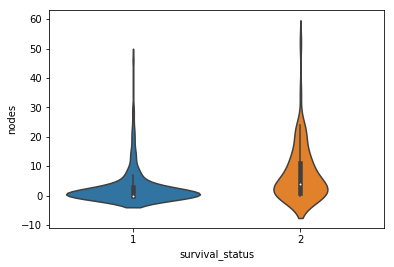

In [29]:
sns.violinplot(x="survival_status", y="nodes", data=haberman, size=8)
plt.show()

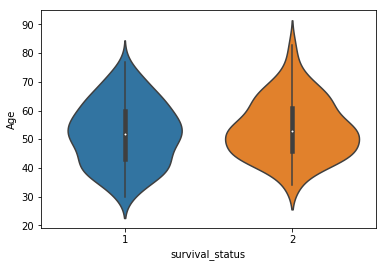

In [30]:
sns.violinplot(x="survival_status", y="Age", data=haberman, size=8)
plt.show()

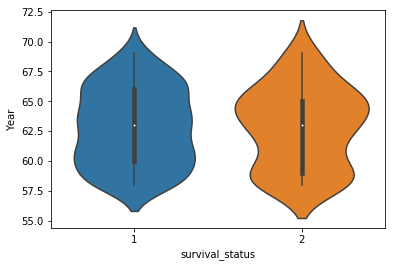

In [31]:
sns.violinplot(x="survival_status", y="Year", data=haberman, size=8)
plt.show()

Compared to other features no. of node seems to be a good feature for univariate analysis.


# BIVARIATE ANALYSIS

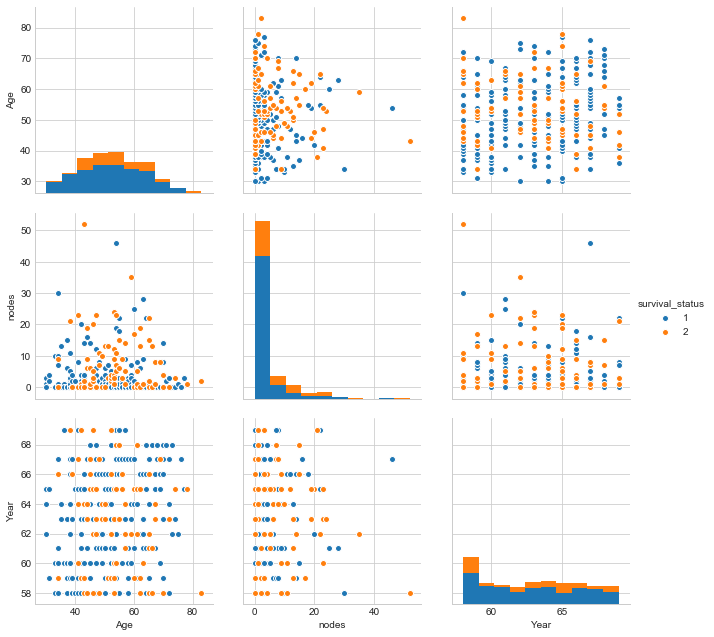

In [36]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", size=3, vars = ["Age","nodes","Year"]);
plt.show()

Observation : Combination of features can not be used to predict survival_status. The points are linearly inseparable.

CONCLUSION : Univariate analysis helps us in finding no. of axillary nodes developed as an important feature of classification.  
Bivariate analysis does not give good results , as the points are linearly inseparable.